# Task Description

In [ ]:
""""
Task 3: Heart Disease Prediction 
Objective: 
Build a model to predict whether a person is at risk of heart disease based on their health data. 
Dataset: 
Heart Disease UCI Dataset (available on Kaggle) 
Instructions: 
● Clean the dataset (handle missing values if any). 
● Perform Exploratory Data Analysis (EDA) to understand trends. 
● Train a classification model (Logistic Regression or Decision Tree). 
● Evaluate using metrics: accuracy, ROC curve, and confusion matrix. 
● Highlight important features affecting prediction. 
Skills: 
● Binary classification 
● Medical data understanding and interpretation 
● Model evaluation using ROC-AUC and confusion matrix 
● Feature importance analysis
"""

# Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


# Loading Dataset

In [2]:

# Step 1: Load Dataset
df = pd.read_csv("D:/heart.csv")  # Make sure heart.csv is downloaded from Kaggle and in the same directory


In [3]:
# Step 2: Data Cleaning
print("Missing values:\n", df.isnull().sum())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Exploratory Data Analysis (EDA)

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
print("\nDataset Info:")
print(df.info())

print("\nTarget Value Counts:")
print(df['target'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Target Value Counts:
target
1    165
0    138
Name: count, dtype: int64


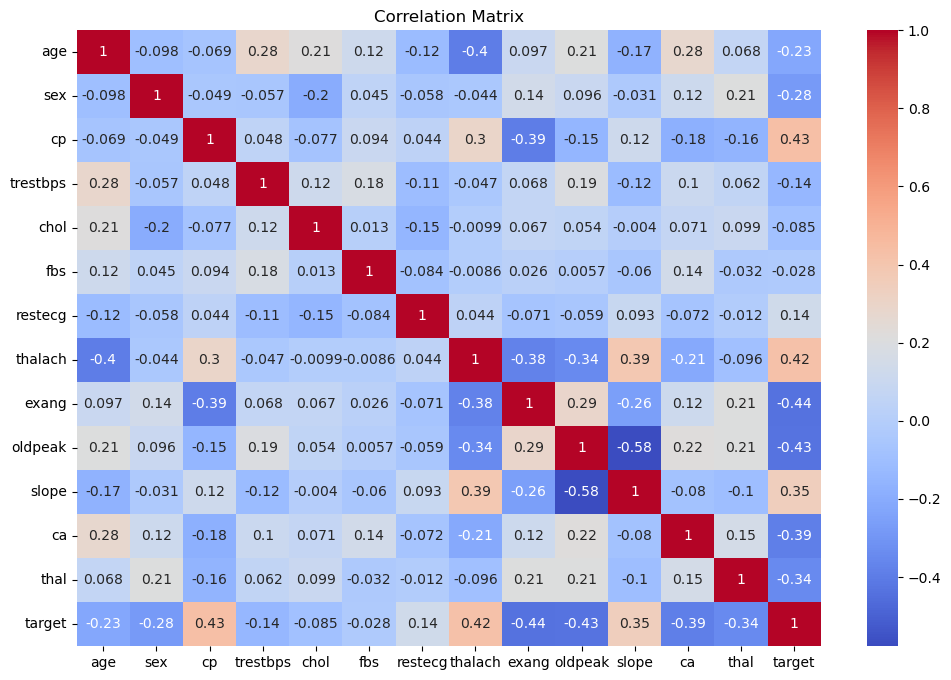

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

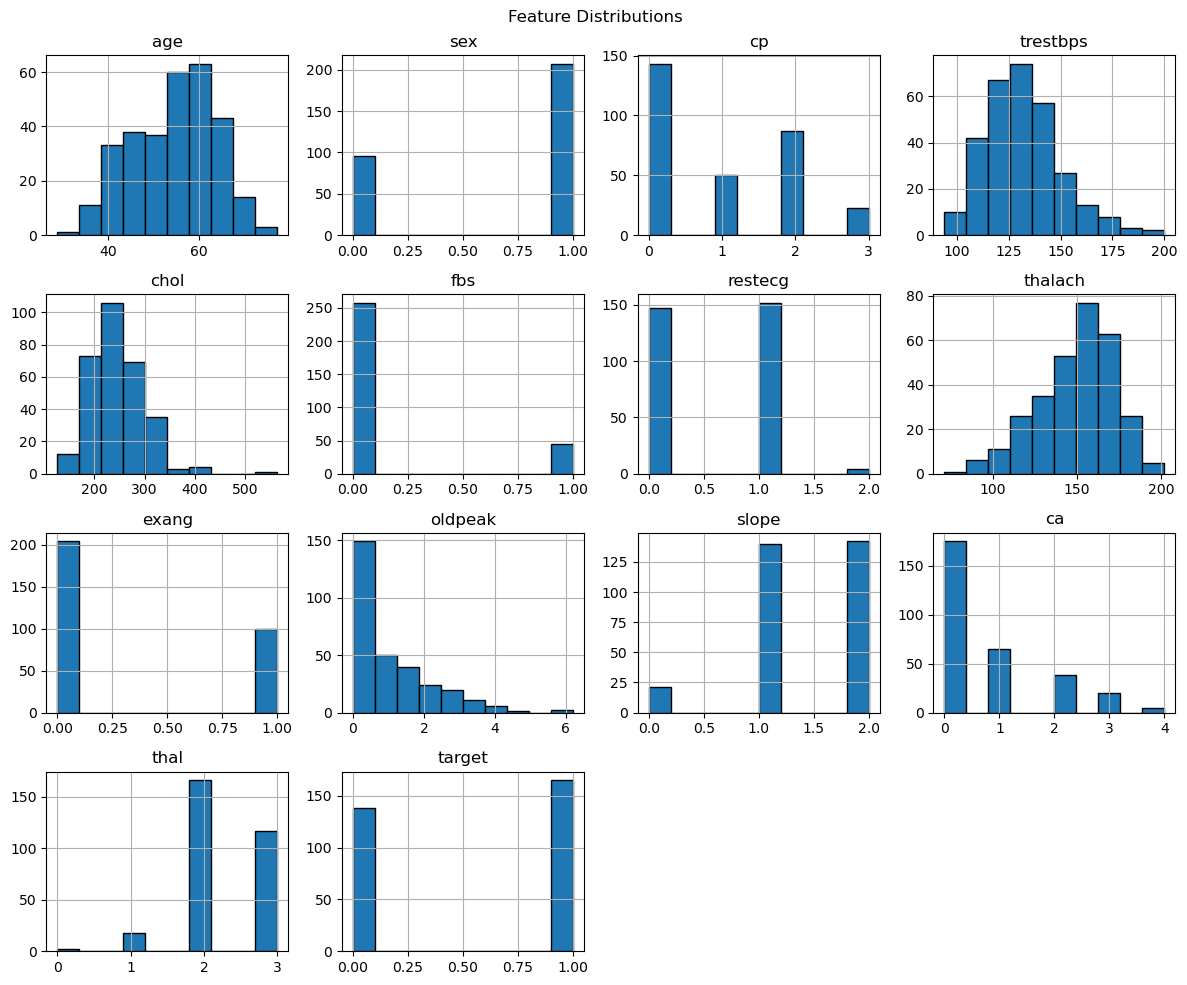

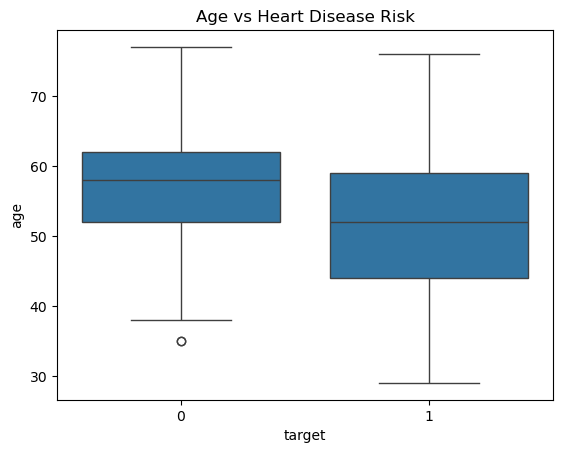

In [6]:

# Histogram of all features
df.hist(figsize=(12, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

# Boxplot of age vs target
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease Risk")
plt.show()



In [7]:
# Step 4: Split Data into Features and Target
X = df.drop('target', axis=1)
y = df['target']

In [8]:
# Step 5: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:

# Step 7: Train a Classification Model (Logistic Regression or Decision Tree)
model = LogisticRegression()
# model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Optional alternative

model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Step 8: Make Predictions and Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(cm)



Accuracy: 0.85
ROC-AUC Score: 0.93
Confusion Matrix:
[[25  4]
 [ 5 27]]


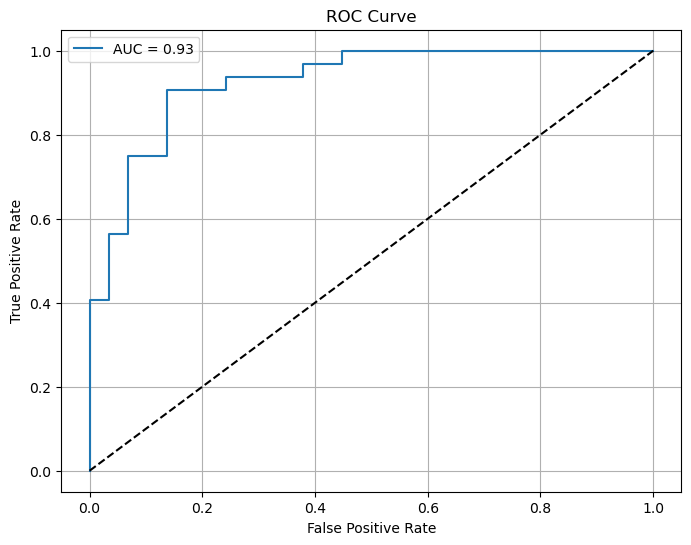

In [12]:


# Step 9: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [13]:

# Step 10: Feature Importance (Logistic Coefficients or Tree Importance)
if isinstance(model, LogisticRegression):
    feature_importance = pd.Series(model.coef_[0], index=df.columns[:-1])
    feature_importance = feature_importance.abs().sort_values(ascending=False)
else:  # Decision Tree
    feature_importance = pd.Series(model.feature_importances_, index=df.columns[:-1])
    feature_importance = feature_importance.sort_values(ascending=False)

print("\nTop 5 Important Features:")
print(feature_importance.head())



Top 5 Important Features:
cp         0.824407
ca         0.813470
sex        0.768878
oldpeak    0.712311
thal       0.581088
dtype: float64


C:\Users\Muhammad Bilal\AppData\Local\Temp\ipykernel_71896\1563199397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='viridis')


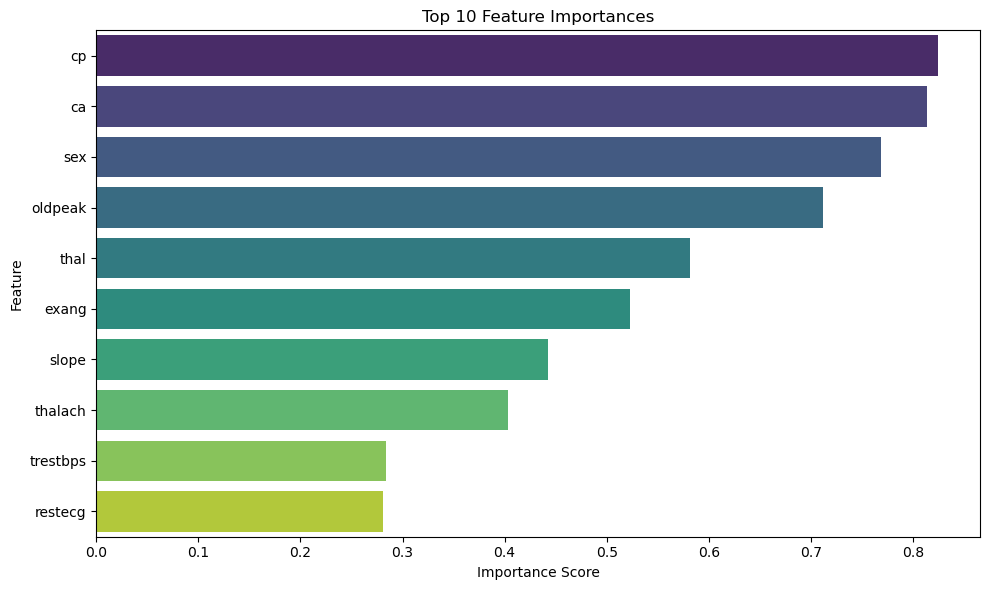

In [14]:

# Bar Plot of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()